<a href="https://colab.research.google.com/github/thanhnt19146391/study/blob/main/CNN_emotions/CNN_emotions_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [277]:
# Import packages
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [278]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
def make_some_noise():
    # Play an audio 
    from google.colab import output
    output.eval_js('new Audio("https://www.soundjay.com/nature/sounds/rain-01.mp3").play()')

In [280]:
def upload_files():
    # Upload file from computer to Colab
    from google.colab import files
    uploaded = files.upload()

# Declare

In [281]:
CLASS = [
    "happy",
    "sad",
    "angry",
    "surprise"
]

In [282]:
def Read_datasets():
    PATH = "/content/drive/MyDrive/Colab Notebooks/AI/CNN_emotions/emotion_datasets/"
    images = []
    values = []
    for key in CLASS:
        value = CLASS.index(key)
        for filename in glob.glob(PATH + key + '/*.*'):
            try:
                img = load_img(
                    filename,
                    target_size = (150, 150)
                )
            except:
                continue
            images.append(img)     
            values.append([value])     

    # Convert list to array
    images = np.array(images)
    values = np.array(values)

    # Create a random permutarion of the indices
    shuffled_indices = np.random.permutation(len(images)) #return a permutation of the indices

    print(f"shuffled indices: {shuffled_indices}")

    # Shuffle 2 array
    images = images[shuffled_indices]
    values = values[shuffled_indices]

    # Join a array along new axis
    images = np.stack(images, axis = 0)
    values = np.stack(values, axis = 0)

    # print(images.shape)
    # print(values.shape)

    # Convert array to tuple
    data = (images, values)

    return data

In [283]:
# Read data
x_data, y_data = Read_datasets()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape) 
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

shuffled indices: [ 92 105  80   6  28  12  32  47 106  48  75  88  71  76  58  87  63  95
  60  59   7  22 104  86  73  15  72 103  61  51  99  31  27 101  90  67
   1  65  35  38  17  81  23  84  14  53  40  55  91  97  46  78  64  56
  16  34  45  33   5  93  41  66  83 107  79   3  50  69  57  30  19   0
  68  21  39   4   2  29  74 102  70  85  49  36  37  52   9  54  89  10
  20  25  82   8  44  62  18  42  98  11  26 100  94  24  96  13  77  43]
Shape of x_train:  (97, 150, 150, 3)
Shape of y_train:  (97, 1)
Shape of x_test:  (11, 150, 150, 3)
Shape of y_test:  (11, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


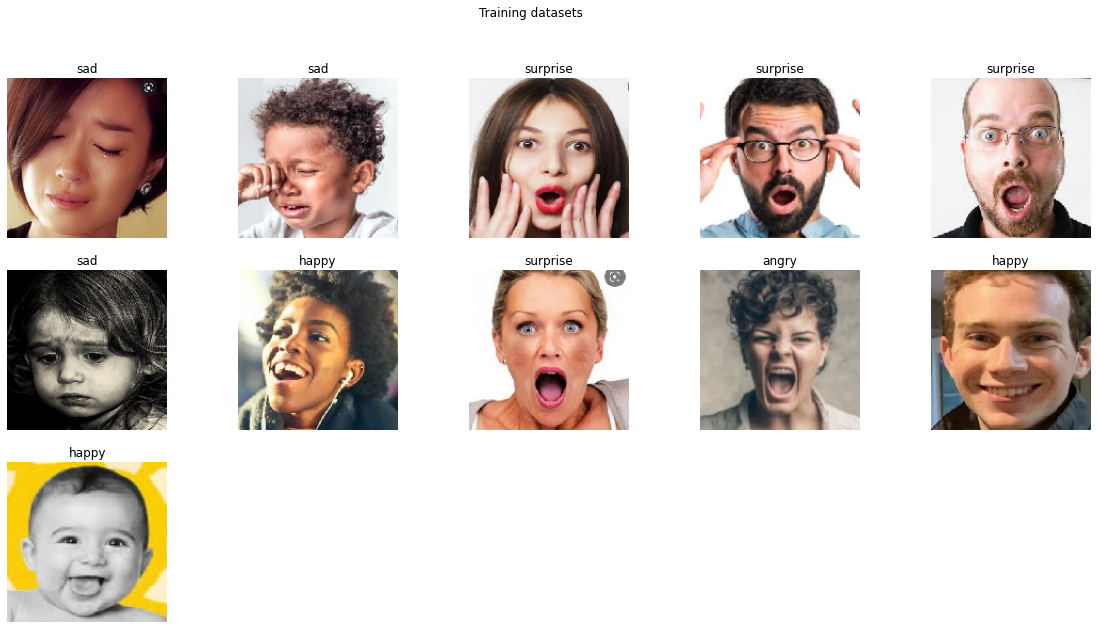

In [284]:
# Show training datasets
plt.figure(figsize = (20, 10))
plt.subplots_adjust(hspace = 0.2)
for i in range(11):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(str(CLASS[y_test[i][0]]))
    plt.axis("off")
_ = plt.suptitle("Training datasets")

In [285]:
def format_input_data(data):
    data = data.astype('float32')
    data /= 255
    return data

In [286]:
def format_output_data(data):
    data = np_utils.to_categorical(data)
    return data

In [287]:
# format datasets
x_train = format_input_data(x_train)
y_train = format_output_data(y_train)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)

x_train shape:  (97, 150, 150, 3)
y_train shape:  (97, 4)


# Build model

In [288]:
def build_model1(input_shape, num_class):
    model = Sequential()

    # 1st block
    model.add(Conv2D(32, (3,3), padding='same',
    input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    # 2nd block
    model.add(Conv2D(64, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # 3rd block
    model.add(Conv2D(128, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    # # 4th block
    model.add(Conv2D(256, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    # dense
    model.add(Flatten())
    model.add(
        Dense(
            128,
            activation = 'relu',
            kernel_initializer = "he_uniform"
        )
    )

    model.add(Dense(num_class, activation='softmax'))
    
    model.summary()
    return model

# Train model

In [289]:
def train_model1(model):
    opt = SGD(
        lr = 0.01, 
        momentum = 0.9
    )
    model.compile(
        loss='categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy']
    )
    # train
    batch_size = 32
    global x_train, y_train, x_test, y_test
    history = model.fit(
        x_train, y_train, 
        batch_size = batch_size,
        epochs = 100, 
    )
    return history

In [290]:
def plot_history(history):
    model_history = pd.DataFrame(history.history)
    # Add column 'epoch'
    model_history['epoch'] = history.epoch
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    num_epochs = model_history.shape[0]
    try:
        ax1.plot(np.arange(0, num_epochs), model_history["accuracy"], 
                label="Training accuracy")
        ax1.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
                label="Validation accuracy")
        ax1.legend()
        ax1.set_ylabel('accuracy')
        ax1.set_xlabel('epoch')
        ax1.set_title('Accuracy')
        ax2.set_title('Loss')
        ax2.plot(np.arange(0, num_epochs), model_history["loss"], 
                label="Training loss")
        ax2.plot(np.arange(0, num_epochs), model_history["val_loss"], 
                label="Validation loss")
        ax2.legend()
        ax2.set_ylabel('loss')
        ax2.set_xlabel('epoch')
        plt.tight_layout()
    except:
        pass
    plt.show()

# Training

In [291]:
model = build_model1((150, 150, 3), 4)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_88 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_89 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_89 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                     

In [292]:
hist = train_model1(model)
make_some_noise()
save_path = "/content/drive/MyDrive/Colab Notebooks/AI/CNN_emotions/CNN_emotions_model1_v2_.h5"
model.save(save_path)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 2s 143ms/step - loss: 22.6206 - accuracy: 0.2268
Epoch 2/100
4/4 [==============================] - 1s 128ms/step - loss: 6.1862 - accuracy: 0.3608
Epoch 3/100
4/4 [==============================] - 1s 128ms/step - loss: 3.7696 - accuracy: 0.3711
Epoch 4/100
4/4 [==============================] - 1s 128ms/step - loss: 1.9829 - accuracy: 0.4948
Epoch 5/100
4/4 [==============================] - 1s 130ms/step - loss: 1.4857 - accuracy: 0.5670
Epoch 6/100
4/4 [==============================] - 1s 131ms/step - loss: 1.2110 - accuracy: 0.5876
Epoch 7/100
4/4 [==============================] - 1s 128ms/step - loss: 1.0993 - accuracy: 0.6495
Epoch 8/100
4/4 [==============================] - 1s 130ms/step - loss: 0.8631 - accuracy: 0.6495
Epoch 9/100
4/4 [==============================] - 1s 129ms/step - loss: 0.6971 - accuracy: 0.7629
Epoch 10/100
4/4 [==============================] - 1s 129ms/step - loss: 0.7038 - accuracy: 0.6701
Epoch 11/100
4/4 [==

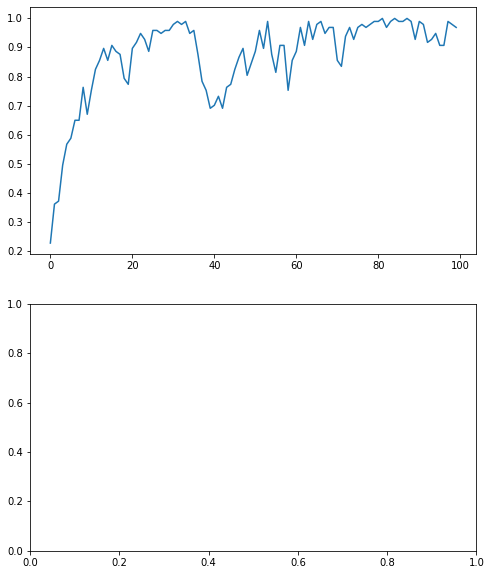

In [293]:
plot_history(hist)

In [294]:
# Load model
model = load_model(save_path)

# Predict


In [295]:
# Save the copy of test batch
test_images = x_test

# format input data
x_test = format_input_data(x_test)
predictions = model.predict(x_test)

# Convert predictions result to Pandas dataframe 
pred_dataframe = pd.DataFrame(predictions)
pred_dataframe.columns = CLASS
pred_dataframe.head(None)

,happy,sad,angry,surprise
0,3.566253e-08,9.998617e-01,5.814240e-15,0.000138
1,5.691798e-06,9.663687e-01,3.352541e-02,0.000100
2,3.535319e-02,6.772779e-01,2.274271e-10,0.287369
3,3.159278e-25,6.018052e-11,1.433643e-21,1.000000
4,3.533856e-03,2.284721e-08,5.564697e-14,0.996466
5,3.224477e-11,9.998778e-01,1.597480e-08,0.000122
6,3.955237e-06,3.144303e-02,2.912693e-06,0.968550
7,1.661171e-05,1.369814e-11,1.088639e-13,0.999983
8,5.052140e-08,4.055342e-02,1.967149e-06,0.959445
9,9.312112e-09,2.687353e-06,7.734927e-13,0.999997


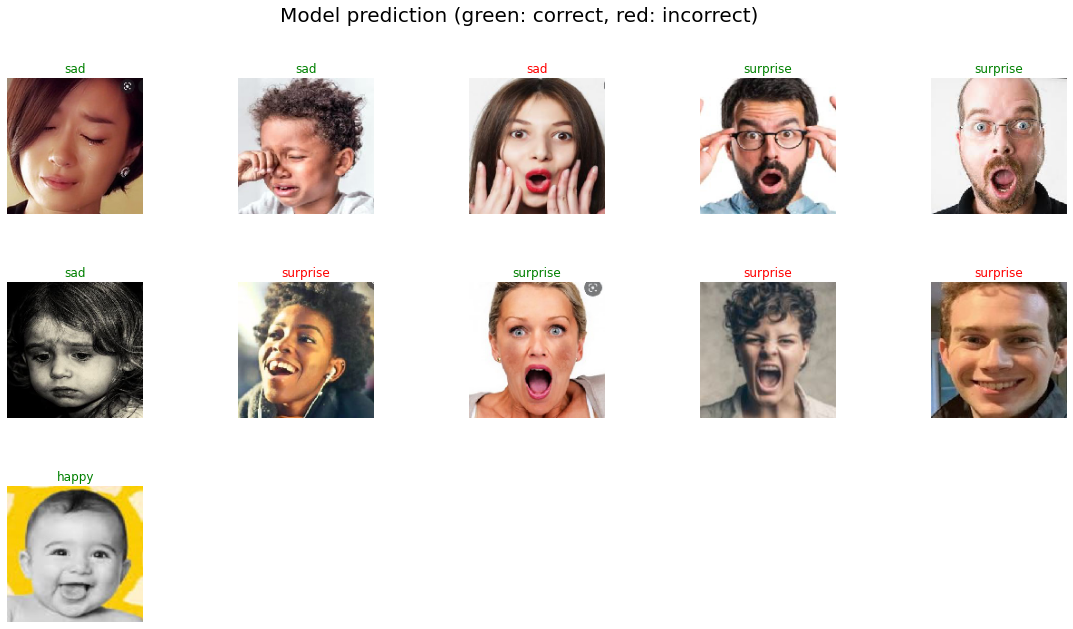

In [298]:
# Get indexs of predictions
pred_ids = np.argmax(predictions, axis = 1)
# Convert CLASS list to array
CLASS = np.array(CLASS)
pred_labels = CLASS[pred_ids]
plt.figure(figsize = (20, 10))
plt.subplots_adjust(hspace = .5)
num_img = x_test.shape[0]

for i in range(num_img):
    plt.subplot(np.ceil(num_img / 5), 5, i + 1)
    plt.imshow(test_images[i])
    COLOR = "green" if pred_ids[i] == y_test[i][0] else "red"
    plt.title(pred_labels[i], color = COLOR)
    plt.axis('off')
_ = plt.suptitle("Model prediction (green: correct, red: incorrect)", size = 20)